# Iris clustering using k-means

Let's play initialy only with the sepal features

- Load the database

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, 2:4] # use only 'petal length and width'
y_iris = iris.target


/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


- Lets plot the distribution

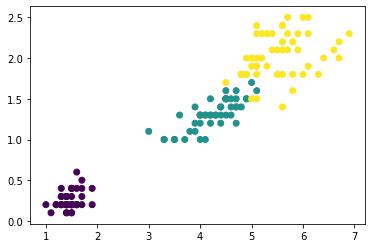

In [2]:
plt.scatter(X[:, 0], X[:, 1], c=y_iris, cmap="viridis")

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
scaler.fit(X)

X = scaler.transform(X) 

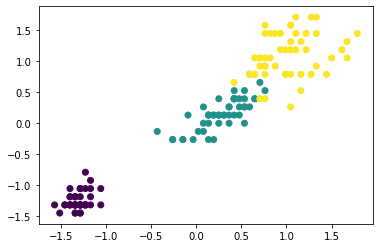

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y_iris, cmap="viridis")

# k-means - Unsupervised Learning

**We are using a lebeled dataset just to confirm the clusters make sense.**

Note that categorical data 'y' will not be used.

**It means that, to the algorithm and in a real situation, data will be like below:**

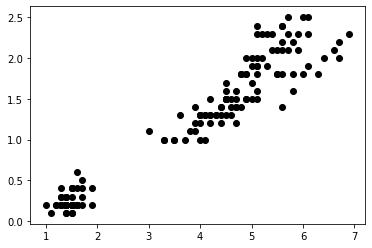

In [5]:
plt.scatter(X[:, 0], X[:, 1], c='black', cmap="viridis")

- Let's create the KMeans cluster with 2, 3 and 4 centroids, fit the data and then plot the results

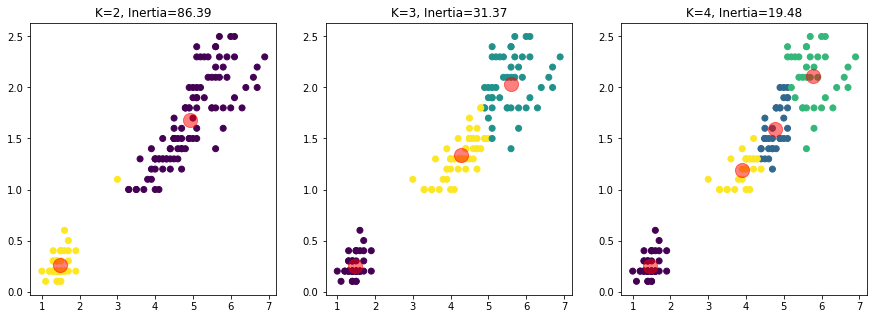

In [6]:

km2 = KMeans(n_clusters=2).fit(X)
km3 = KMeans(n_clusters=3).fit(X)
km4 = KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_, cmap="viridis")
plt.title("K=2, Inertia=%.2f" % km2.inertia_)
c2 = km2.cluster_centers_
plt.scatter(c2[:, 0], c2[:, 1], c='red', s=200, alpha=0.5)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_, cmap="viridis")
plt.title("K=3, Inertia=%.2f" % km3.inertia_)
c3 = km3.cluster_centers_
plt.scatter(c3[:, 0], c3[:, 1], c='red', s=200, alpha=0.5)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_, cmap="viridis")
plt.title("K=4, Inertia=%.2f" % km4.inertia_)
c4 = km4.cluster_centers_
plt.scatter(c4[:, 0], c4[:, 1], c='red', s=200, alpha=0.5)

- Now, try to find the best K using Elbown Curve

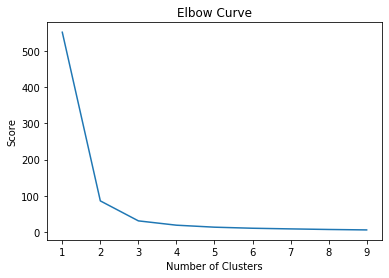

In [7]:
import numpy as np
X = iris.data[:, 2:4] # use only 'petal length and sepal width'
y_iris = iris.target


k = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in k]

score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))]

plt.plot(k,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()


It seems that the best bet is between 2 and 3.

No great improvement after 4.

**Note that k-means does not know the target classes, yet it achieves a high similarity between the real classes and the clusters found when k=3:**

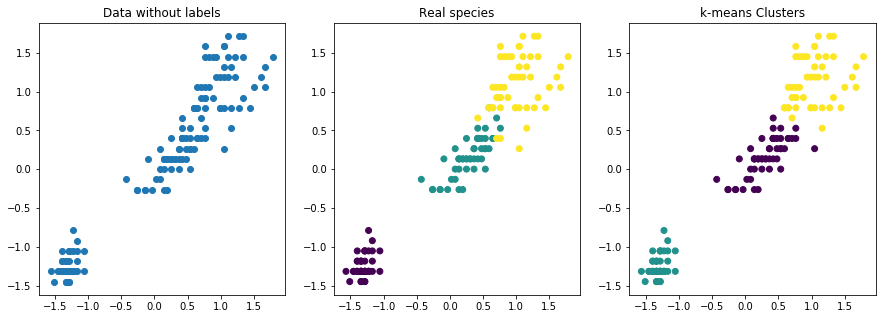

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("Data without labels")
plt.scatter(X[:, 0], X[:, 1])

plt.subplot(132)
plt.title("Real species")
plt.scatter(X[:, 0], X[:, 1], c=y_iris)


plt.subplot(133)
plt.title("k-means Clusters")
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
